### Evaluate final U-Net models trained on collection of grayscale cat images

In [1]:
import os
import sys
sys.path.append('../reconstruct_missing_data')

from pathlib import Path
from json import dump, load

import numpy as np
import xarray as xr
from matplotlib import pyplot as plt

from data_loading import (
    clone_data, 
    create_missing_mask, 
    split_and_scale_data,
)

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, concatenate, Conv1D, Conv2D, MaxPool2D, UpSampling2D, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD
import tensorflow.keras.initializers as tfi
import tensorflow.keras.regularizers as tfr
from tensorflow.keras.utils import plot_model

# Suppress Tensorflow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# Check current working directory:
print(os.getcwd())

/gxfs_work1/geomar/smomw511/GitHub/MarcoLandtHayen/reconstruct_missing_data/notebooks


In [3]:
# Set working directory, according to working directory in scripts:
os.chdir('/gxfs_work1/geomar/smomw511') # nesh
# os.chdir('/Users/mlandt-hayen') # local
# os.chdir('/work') # local in Docker Container

In [46]:
## Specify parameters:

# Set path to data: Subset of cat images prepared as numpy array.
path_to_data = "GitHub/MarcoLandtHayen/reconstruct_missing_data/data/raw"

# Set paths to final models:
paths_to_final_models='GitGeomar/marco-landt-hayen/reconstruct_missing_data_results/unet_4conv_cats_1300_variable_discrete_factor_1_final'

# Source: 
source = 'cats_1300'

# Set rate of missing values:
missing = 0.9

# Further parameters for pre-processing inputs and targets:
train_val_split = 0.8
scale_to = 'zero_one'

In [47]:
## Prepare data:

# Load data:
data = np.load(path_to_data + '/' + source + '.npy')

## Re-load missing mask for specified rate of missing values:

# Rel. amount of missing values = 0.999 requires special treatment:
if missing==0.999:
    missing_mask = np.load(paths_to_final_models + '/missing_' + str(int(missing*1000)) + '/missing_mask.npy')
else:
    missing_mask = np.load(paths_to_final_models + '/missing_' + str(int(missing*100)) + '/missing_mask.npy')

# Use sparse data as inputs and complete data as targets. Split sparse and complete data into training and validation sets.
# Scale or normlalize data according to statistics obtained from only training data.
(
    train_input,
    val_input,
    train_target,
    val_target,
    train_min,
    train_max,
    train_mean,
    train_std,
) = split_and_scale_data(data, missing_mask, train_val_split, scale_to)

In [48]:
## Reload final model with minimum validation loss for specified rate of missing values:

# Rel. amount of missing values = 0.999 requires special treatment:
if missing==0.999:
    model = tf.keras.models.load_model(Path(paths_to_final_models + '/missing_' + str(int(missing*1000)) + '/model'))
else:
    model = tf.keras.models.load_model(Path(paths_to_final_models + '/missing_' + str(int(missing*100)) + '/model'))

In [49]:
## Get model predictions on training and validation data (first 10 samples):
train_pred = model.predict(train_input[:10])
val_pred = model.predict(val_input[:10])

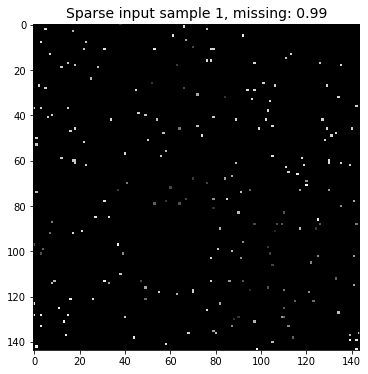

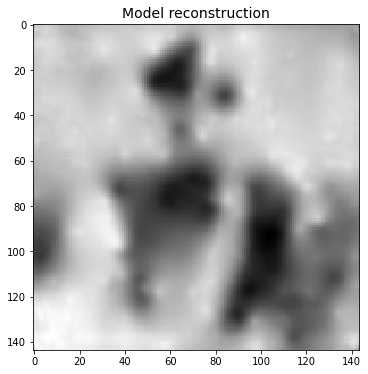

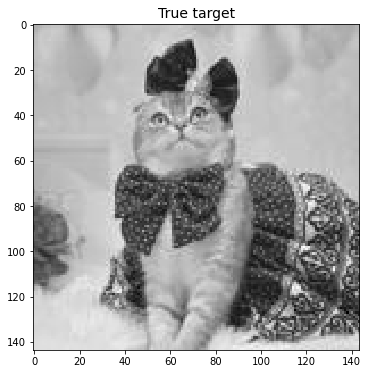

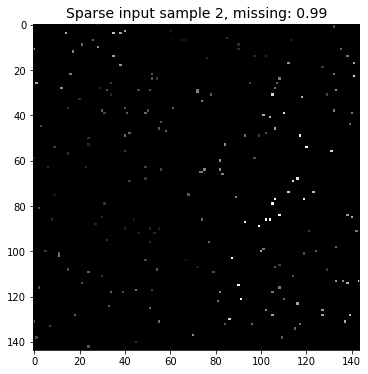

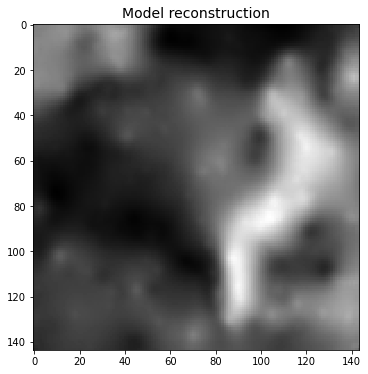

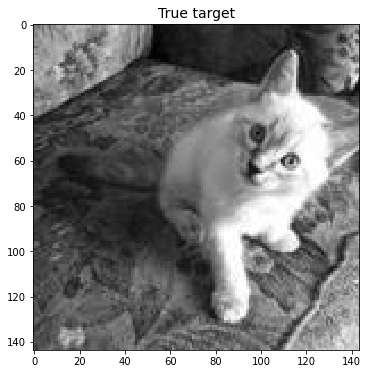

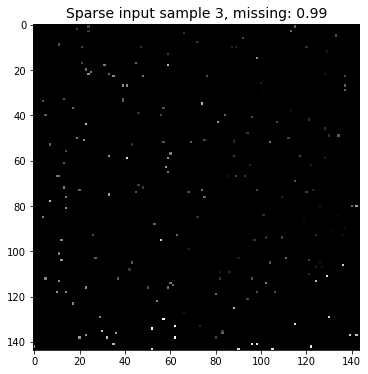

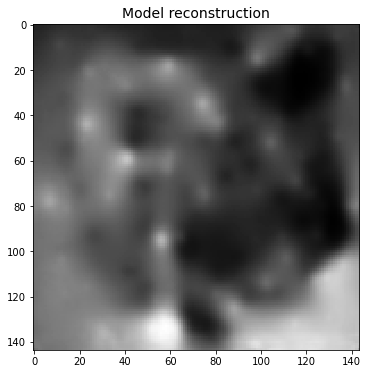

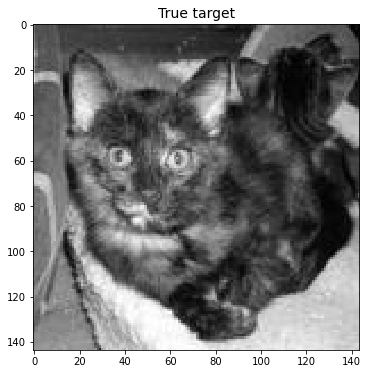

In [39]:
### Validation data: 99% missing

## Plot example images as grayscale heatmaps: Validation samples with sparse inputs and corresponding model reconstructions.

# Set number of samples:
n_samples = 3

# Loop over desired number of samples:
for n in range(n_samples):
    
    # Plot sparse input for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_input[n,:,:,0], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('Sparse input sample '+str(n+1)+', missing: '+str(missing), fontsize=14)
    plt.show()
    
    # Plot model reconstruction for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_pred[n,:,:,0], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('Model reconstruction', fontsize=14)
    plt.show()
    
    # Plot model reconstruction for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_target[n,:,:], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('True target', fontsize=14)
    plt.show()

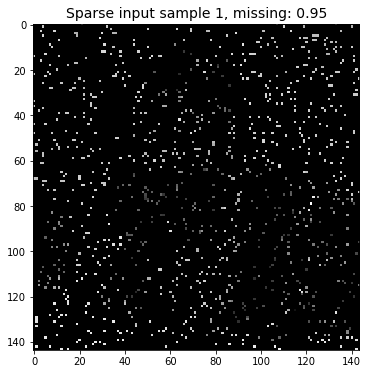

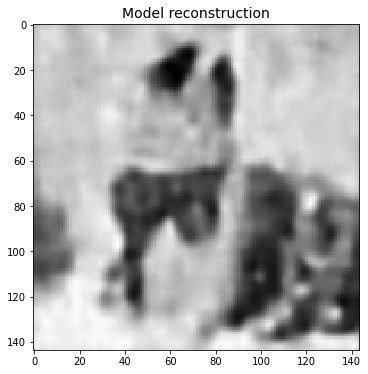

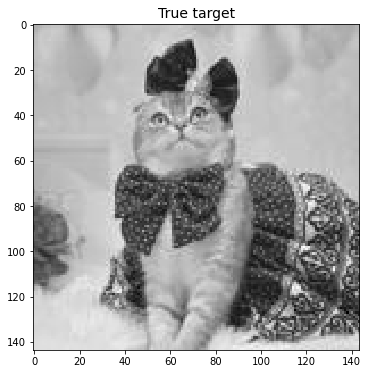

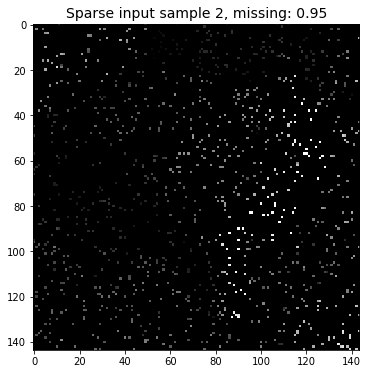

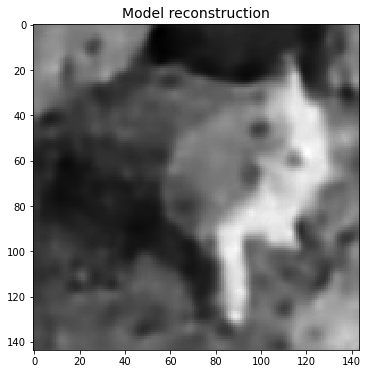

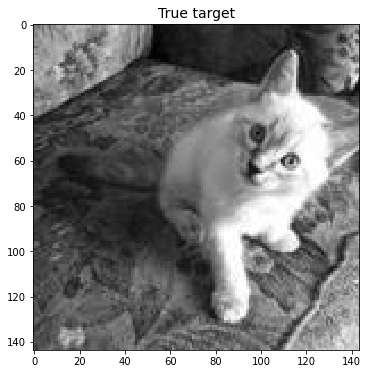

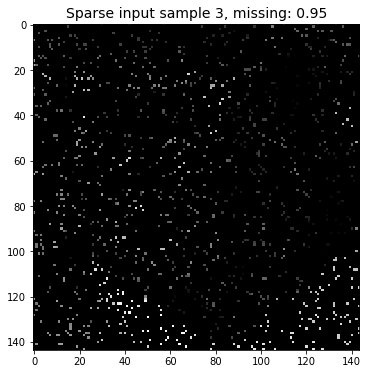

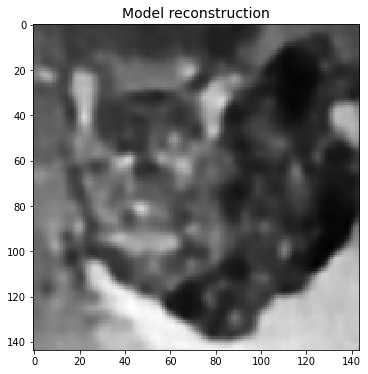

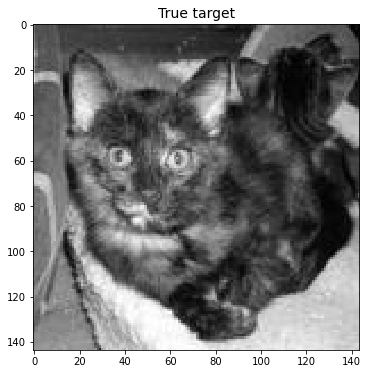

In [45]:
### Validation data: 95% missing

## Plot example images as grayscale heatmaps: Validation samples with sparse inputs and corresponding model reconstructions.

# Set number of samples:
n_samples = 3

# Loop over desired number of samples:
for n in range(n_samples):
    
    # Plot sparse input for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_input[n,:,:,0], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('Sparse input sample '+str(n+1)+', missing: '+str(missing), fontsize=14)
    plt.show()
    
    # Plot model reconstruction for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_pred[n,:,:,0], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('Model reconstruction', fontsize=14)
    plt.show()
    
    # Plot model reconstruction for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_target[n,:,:], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('True target', fontsize=14)
    plt.show()

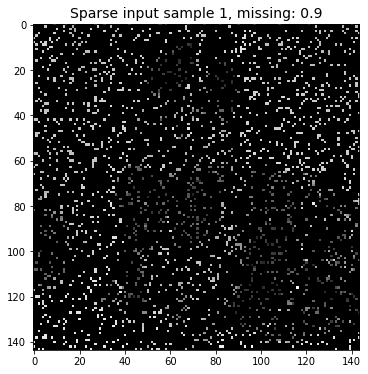

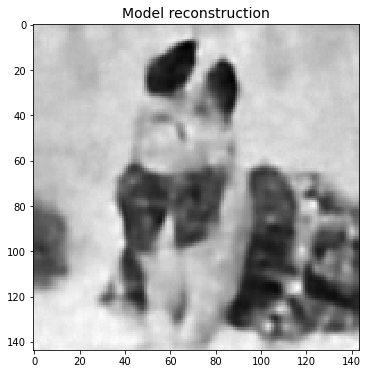

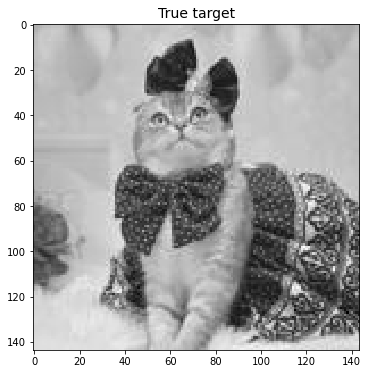

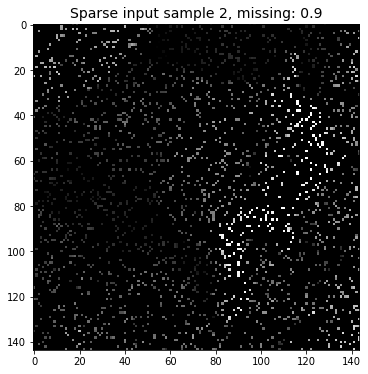

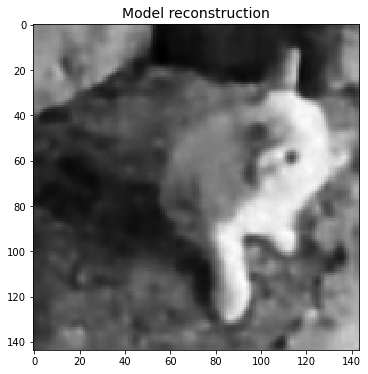

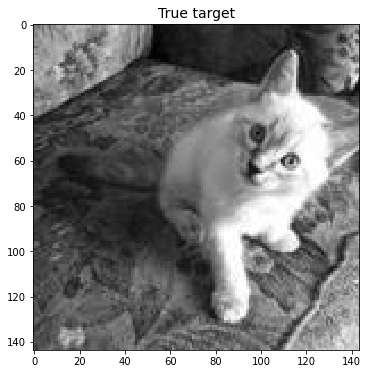

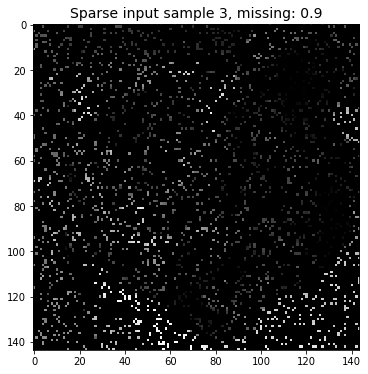

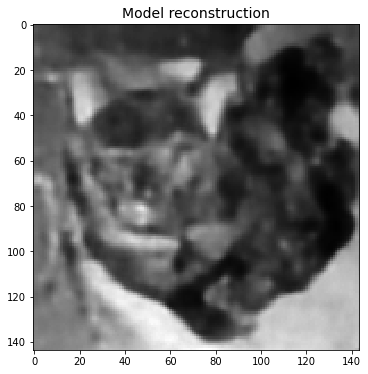

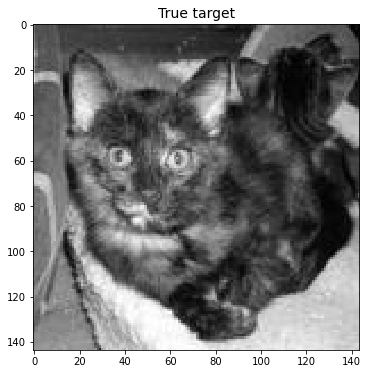

In [50]:
### Validation data: 90% missing

## Plot example images as grayscale heatmaps: Validation samples with sparse inputs and corresponding model reconstructions.

# Set number of samples:
n_samples = 3

# Loop over desired number of samples:
for n in range(n_samples):
    
    # Plot sparse input for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_input[n,:,:,0], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('Sparse input sample '+str(n+1)+', missing: '+str(missing), fontsize=14)
    plt.show()
    
    # Plot model reconstruction for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_pred[n,:,:,0], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('Model reconstruction', fontsize=14)
    plt.show()
    
    # Plot model reconstruction for current sample:
    fig, ax = plt.subplots(figsize=(6, 6))
    im = plt.imshow(val_target[n,:,:], cmap="gray", interpolation='nearest')#, vmax=0.003)
    #cbar = plt.colorbar(im)
    plt.title('True target', fontsize=14)
    plt.show()